# Assignment in Information Retrieval Course

### imports:

In [1]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import re
from nltk import ngrams
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Language modeling for the directory "Train and Test"

## uploading the 50 files from the train and test directory into set_of_texts list:

In [2]:
def open_directory(directory):
    set_of_texts = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        text = open(file_path, 'r', encoding='utf-8').read()
        set_of_texts.append({'Text': text})
    return pd.DataFrame(set_of_texts)

train_and_test_data = open_directory(r"C:\Users\PC\train and test text")
print(train_and_test_data)

                                                 Text
0   ii46\n\nTHEORY AND METHODS\n\nA framework to a...
1     1Journal of Epidemiology and Comnmunity Heal...
2   ARTICLE\n\nA “Scientific Diversity” Interventi...
3                                       A Large-Sc...
4   International Journal for Equity in\nHealth   ...
5   Gender Bias in Cardiovascular Testing Persists...
6   ACL Supplement: Introduction\n\nGuesT ediTors:...
7   Balanced Datasets Are Not Enough:\n\nEstimatin...
8   https://doi.org/10.1007/s11192-018-2667-0\n\nB...
9   Eos, Vol. 92, No. 47, 22 November 2011\n\n\nDo...
10                                                ...
11                                                ...
12  Examining Gender Bias in Languages with Gramma...
13  Fertility Decline and Gender Bias\n\n637\n\nFE...
14  Adv in Health Sci Educ (2009) 14:135–152\nDOI ...
15  This is the author’s version of a work that wa...
16  Munich Personal RePEc Archive\n\nGender Bias A...
17  Received: 17 December 20

## 1.  Tokenize the text from the train and test directory

In [3]:
def tokenize_Text(List_of_texts):
    # replace any char that not a letter with white space thin separate with white space
    replace_chars = r'[^a-zA-Z\s]'

    tokenized_texts = []
    for index, row in List_of_texts.iterrows():
        cleaned_text = re.sub(replace_chars, ' ', row['Text'])
        tokens = word_tokenize(cleaned_text)
        tokenized_texts.append({'Text': tokens})
    return pd.DataFrame(tokenized_texts)


tokenized_df = tokenize_Text(train_and_test_data)

# Print the tokenized DataFrame
print(tokenized_df)

                                                 Text
0   [ii, THEORY, AND, METHODS, A, framework, to, a...
1   [Journal, of, Epidemiology, and, Comnmunity, H...
2   [ARTICLE, A, Scientific, Diversity, Interventi...
3   [A, Large, Scale, Test, of, Gender, Bias, in, ...
4   [International, Journal, for, Equity, in, Heal...
5   [Gender, Bias, in, Cardiovascular, Testing, Pe...
6   [ACL, Supplement, Introduction, GuesT, ediTors...
7   [Balanced, Datasets, Are, Not, Enough, Estimat...
8   [https, doi, org, s, Bias, against, research, ...
9   [Eos, Vol, No, November, Does, Gender, Bias, I...
10  [Evaluating, Gender, Bias, in, Machine, Transl...
11  [Evaluating, the, Underlying, Gender, Bias, in...
12  [Examining, Gender, Bias, in, Languages, with,...
13  [Fertility, Decline, and, Gender, Bias, FERTIL...
14  [Adv, in, Health, Sci, Educ, DOI, s, z, REFLEC...
15  [This, is, the, author, s, version, of, a, wor...
16  [Munich, Personal, RePEc, Archive, Gender, Bia...
17  [Received, December, DOI

## 2.  Create a language model for your collection

In [4]:
def build_ngram_model(data, n):
    # Union all text tokens into one list
    if len(data)>1:
        all_tokens = [token for sublist in data for token in sublist]
    else:
        all_tokens = data
    # Generate n-grams from all the tokens
    ngrams_list = list(ngrams(all_tokens, n))
    
    # Count the occurrences of each n-gram
    ngrams_counter = Counter(ngrams_list)
    
    # Calculate the frequency of each n-gram
    total_ngrams = len(ngrams_list)
    ngrams_freq = {}
    for ngram, count in ngrams_counter.items():
        freq = count / total_ngrams
        ngrams_freq[ngram] = {'Count': count, 'Frequency': freq}
    
    # Convert ngrams_freq to a DataFrame
    df = pd.DataFrame.from_dict(ngrams_freq, orient='index')
    df.index.name = 'N-gram'
    df.reset_index(inplace=True)
    
    # Sort the DataFrame by frequency in descending order
    df = df.sort_values(by='Count', ascending=False)
    df = df.reset_index(drop=True)
    
    return df 

def count_uniqe_words(data):
    all_tokens = [token for sublist in data for token in sublist]
    return len(set(all_tokens))

def count_words(data):
    all_tokens = [token for sublist in data for token in sublist]
    return len(all_tokens)


ngram_model  = build_ngram_model(tokenized_df['Text'], 1)
word_count_original = count_words(tokenized_df['Text'])
unique_word_count_original = count_uniqe_words(tokenized_df['Text'])

In [5]:
ngram_model[0:20]

,level_0,Count,Frequency
0,the,15616,0.039947
1,of,12447,0.031841
2,and,12301,0.031467
3,in,9299,0.023788
4,to,7212,0.018449
5,a,5207,0.013320
6,for,4225,0.010808
7,gender,4165,0.010654
8,that,3441,0.008802
9,is,3106,0.007945


In [6]:
print(f"The Number of words in the orginal Data is: {word_count_original}")  
print(f"The Number of uniqe words in the orginal Data is: {unique_word_count_original}")    

The Number of words in the orginal Data is: 390917
The Number of uniqe words in the orginal Data is: 27436


## 3.  Perform a set of linguistic operations </br>
### a. Remove stop words (a list is in the joint folder)


In [7]:
# Get the english stopwords
stop_words = set(stopwords.words('english'))


def remove_stop_words(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

# Apply remove_stop_words function to each file tokens
text_Without_Stopwords = pd.DataFrame(tokenized_df['Text'].apply(remove_stop_words))

ngram_model = build_ngram_model(text_Without_Stopwords['Text'], 1)
word_count_Without_Stopwords = count_words(text_Without_Stopwords['Text'])
unique_word_count_Without_Stopwords = count_uniqe_words(text_Without_Stopwords['Text'])

In [8]:
ngram_model[0:20]

,level_0,Count,Frequency
0,gender,4165,0.016491
1,bias,2583,0.010227
2,women,2154,0.008529
3,al,1732,0.006858
4,et,1715,0.006790
5,female,1162,0.004601
6,male,1039,0.004114
7,Gender,980,0.003880
8,men,973,0.003853
9,J,882,0.003492


In [9]:
print(f"The Number of words after removing the Stopwords : {word_count_Without_Stopwords}")  
print(f"The Number of uniqe words after removing the Stopwords : {unique_word_count_Without_Stopwords}")  

The Number of words after removing the Stopwords : 252561
The Number of uniqe words after removing the Stopwords : 27128


### b.  Perform Case Folding

In [10]:
def lowercase_list(sublist):
    return [word.lower() for word in sublist]

# Perform case folding (convert text to lowercase) using the function and apply function
text_after_case_folding = pd.DataFrame(text_Without_Stopwords['Text'].apply(lowercase_list))

ngram_model = build_ngram_model(text_after_case_folding['Text'], 1)
word_count_after_case_folding = count_words(text_after_case_folding['Text'])
unique_word_count_after_case_folding = count_uniqe_words(text_after_case_folding['Text'])

In [11]:
ngram_model[0:20]

,level_0,Count,Frequency
0,gender,5176,0.020494
1,bias,2953,0.011692
2,women,2605,0.010314
3,al,1747,0.006917
4,et,1720,0.006810
5,female,1369,0.005420
6,male,1260,0.004989
7,men,1045,0.004138
8,j,949,0.003758
9,e,941,0.003726


In [12]:
print(f"The Number of words after Performing Case Folding : {word_count_after_case_folding}")  
print(f"The Number of uniqe words after Performing Case Folding : {unique_word_count_after_case_folding}") 

The Number of words after Performing Case Folding : 252561
The Number of uniqe words after Performing Case Folding : 22351


### c. Perform Stemming, using porter

In [13]:
# Initialize the Porter stemmer
porter_stemmer = PorterStemmer()


def stem_words(word_list):
    return [porter_stemmer.stem(word) for word in word_list]

text_after_stemming = pd.DataFrame(text_after_case_folding['Text'].apply(stem_words))

ngram_model = build_ngram_model(text_after_stemming['Text'], 1)
word_count_after_stemming = count_words(text_after_stemming['Text'])
unique_word_count_after_stemming = count_uniqe_words(text_after_stemming['Text'])

In [14]:
ngram_model[0:20]

,level_0,Count,Frequency
0,gender,5522,0.021864
1,bia,2954,0.011696
2,women,2618,0.010366
3,al,1752,0.006937
4,et,1720,0.006810
5,femal,1656,0.006557
6,male,1547,0.006125
7,differ,1404,0.005559
8,use,1163,0.004605
9,studi,1153,0.004565


In [15]:
print(f"The Number of words after Performing stemming : {word_count_after_stemming}")  
print(f"The Number of uniqe words after Performing stemming : {unique_word_count_after_stemming}") 

The Number of words after Performing stemming : 252561
The Number of uniqe words after Performing stemming : 16325


### check if the final Language Model match zip'f Law:

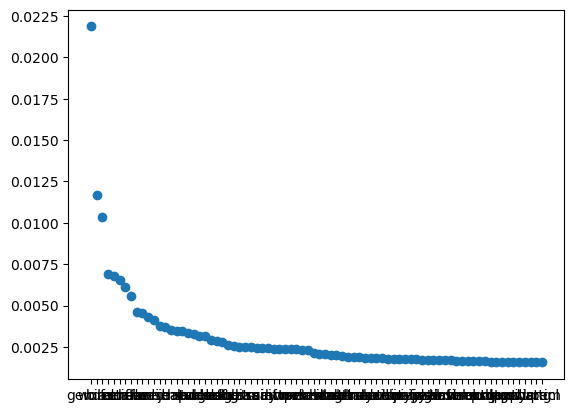

In [16]:
x_values = (ngram_model[0:80])['level_0']
y_values = (ngram_model[0:80])['Frequency']

plt.scatter(x_values,y_values)

# Text classification

### 1.  Use the "Train and Test" and the "Negative examples" directories


In [17]:
train_and_test_data = open_directory(r"C:\Users\PC\train and test text")
negative_examples_data = open_directory(r"C:\Users\PC\negative set text")

### 2. Label the documents – belong to your category or not

In [18]:
train_and_test_data['label'] = 1
negative_examples_data['label'] = 0

### 3. Perform linguistic operations </br>
#### a. Tokenize

In [19]:
tokenized_train_and_test= tokenize_Text(train_and_test_data)
tokenized_negative_examples= tokenize_Text(negative_examples_data)

#### b. Remove stop words

In [20]:
# Apply remove_stop_words function to each file tokens
text_Without_Stopwords_train_and_test = pd.DataFrame(tokenized_train_and_test['Text'].apply(remove_stop_words))
text_Without_Stopwords_negative_examples = pd.DataFrame(tokenized_negative_examples['Text'].apply(remove_stop_words))

### 4. Use a machine learning library that is freely available (WEKA1 for instance or  SCIKIT2 )

#### a. Select 4 classifiers of your choice

In [21]:
# We choose this four classifiers:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

logistic_regression = LogisticRegression()
knn_classifier = KNeighborsClassifier()
adaboost_classifier = AdaBoostClassifier()
multinomialNB_classifier = MultinomialNB()

classifiers = [
    multinomialNB_classifier,
    logistic_regression,
    knn_classifier,
    adaboost_classifier
]

In [22]:
def classify(classifier):
    accs = []
    recalls = []
    precisions = []
    f1_scores = []
    Total_test=[]
    Total_pred=[]
        # Iterate over the folds and evaluate classifier
    for fold, (train_indices, test_indices) in enumerate(kfold.split(X_tfidf, y), 1):
        X_train, X_test = X_tfidf[train_indices], X_tfidf[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

        # Initialize and train DecisionTreeClassifier
        classifier.fit(X_train, y_train)

        # Predict the target values for the test data
        y_pred = classifier.predict(X_test)

        Total_test.extend(y_test)
        Total_pred.extend(y_pred)
        # Calculate and print the accuracy of the classifier for the current fold
        accuracy = accuracy_score(y_test, y_pred)
        accs.append(accuracy)
        # Calculate precision, recall, and F1 score
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    # Compute mean precision, recall, and F1 score
    mean_precision = np.mean(precisions)
    mean_recall = np.mean(recalls)
    mean_f1 = np.mean(f1_scores)
    
    evaluation_results[classifier.__class__.__name__] = {
    'Precision': mean_precision,
    'Recall': mean_recall,
    'F1 Score': mean_f1}
    
        # Plot confusion matrix
    conf_matrix = confusion_matrix(Total_test, Total_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {classifier.__class__.__name__}')
    plt.show()
        
    mean_accuarcy = np.mean(accs)    
    print(f"{classifier.__class__.__name__} Accuracy: {100*mean_accuarcy:.2f}%")
    print("-------------------------------------------------------------------")
    return np.mean(accs)

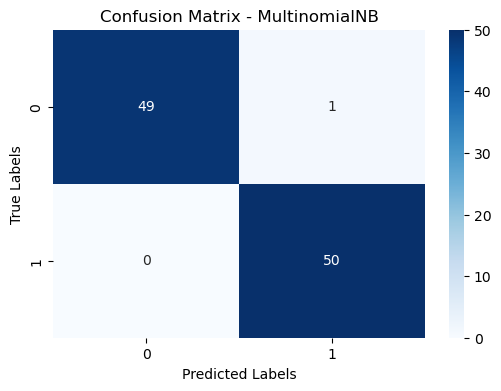

MultinomialNB Accuracy: 99.00%
-------------------------------------------------------------------


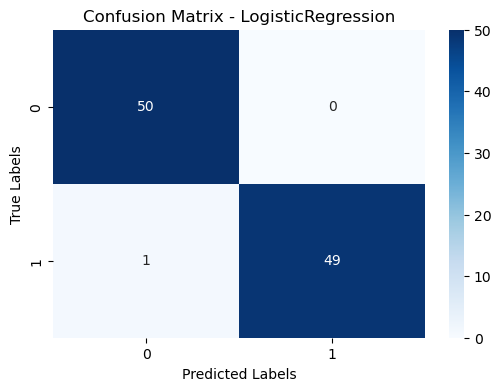

LogisticRegression Accuracy: 99.00%
-------------------------------------------------------------------


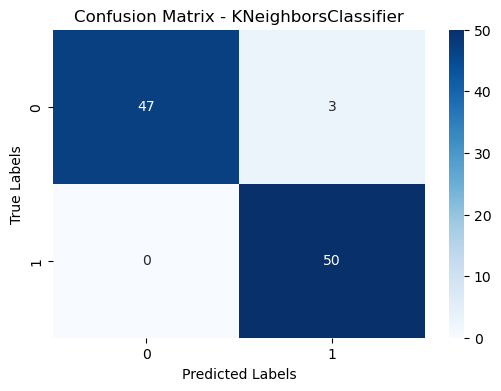

KNeighborsClassifier Accuracy: 97.00%
-------------------------------------------------------------------


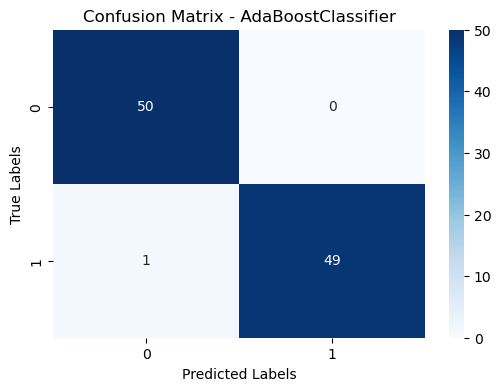

AdaBoostClassifier Accuracy: 99.00%
-------------------------------------------------------------------


In [23]:
combined_df = pd.concat([text_Without_Stopwords_train_and_test, text_Without_Stopwords_negative_examples], ignore_index=True)
combined_df['label'] = [1] * len(text_Without_Stopwords_train_and_test) + [0] * len(text_Without_Stopwords_negative_examples)

X = combined_df['Text'].apply(' '.join)
y = combined_df['label']

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform text data into TF-IDF weights
X_tfidf = vectorizer.fit_transform(X)

np.random.seed(123)
# Initialize and define kfold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

evaluation_results = {}
for classifier in classifiers: 
    classify(classifier)

### Precision, Recall, and F1

In [24]:
pd.DataFrame(evaluation_results).transpose()

,Precision,Recall,F1 Score
MultinomialNB,0.983333,1.00,0.990909
LogisticRegression,1.000000,0.98,0.988889
KNeighborsClassifier,0.950000,1.00,0.972727
AdaBoostClassifier,1.000000,0.98,0.988889


# Text clustering

### 1.  Take documents from three additional directories

In [25]:
formal_fairness_data = open_directory(r"C:\Users\PC\cluster 3")
explainable_AI_data = open_directory(r"C:\Users\PC\cluster 4")

In [26]:
# Tekonize 
tokenized_formal_fairness= tokenize_Text(formal_fairness_data)
tokenized_explainable_AI= tokenize_Text(explainable_AI_data)

# Remove stop words
# Apply remove_stop_words function to each file tokens
text_Without_Stopwords_formal_fairness = pd.DataFrame(tokenized_formal_fairness['Text'].apply(remove_stop_words))
text_Without_Stopwords_explainable_AI = pd.DataFrame(tokenized_explainable_AI['Text'].apply(remove_stop_words))

# add labels [0, 1, 2, 3]
text_Without_Stopwords_train_and_test['label'] = 0
text_Without_Stopwords_formal_fairness['label'] = 1
text_Without_Stopwords_negative_examples['label'] = 2
text_Without_Stopwords_explainable_AI['label'] = 3

# 2.  Use a machine learning library that is freely available

### a. Perform clustering using K-means and 4 clusters

In [27]:
# Concatenate all data frames into one
combined_df = pd.concat([text_Without_Stopwords_train_and_test,text_Without_Stopwords_negative_examples, 
                         text_Without_Stopwords_formal_fairness, text_Without_Stopwords_explainable_AI])

vectorizer = TfidfVectorizer()
# create TF-IDF features
X = vectorizer.fit_transform(combined_df['Text'].apply(' '.join))

# Initialize KMeans clustering algorithm
kmeans = KMeans(n_clusters=4, random_state=123)

# Fit KMeans to the TF-IDF features
kmeans.fit(X)

# Add cluster labels to the combined data frame
combined_df['Cluster'] = kmeans.labels_

print(combined_df)


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                                                 Text  label  Cluster
0   [ii, THEORY, METHODS, framework, analyse, gend...      0        0
1   [Journal, Epidemiology, Comnmunity, Health, j,...      0        0
2   [ARTICLE, Scientific, Diversity, Intervention,...      0        0
3   [Large, Scale, Test, Gender, Bias, Media, Eran...      0        0
4   [International, Journal, Equity, Health, BioMe...      0        0
..                                                ...    ...      ...
45  [article, downloaded, December, Publisher, Ins...      3        3
46  [IEEE, Access, Multidiscipinary, Rapid, Review...      3        3
47  [Check, updates, Received, November, Revised, ...      3        3
48  [th, IEEE, ACM, International, Conference, Pro...      3        3
49  [el, materials, miPr, Article, Feature, Import...      3        1

[200 rows x 3 columns]


In [28]:
# Compute accuracy
accuracy = accuracy_score(combined_df['label'], combined_df['Cluster'])

print(f"Clustering Accuracy: {100*accuracy:.2f}%")

Clustering Accuracy: 88.50%


### Confusion Matrix

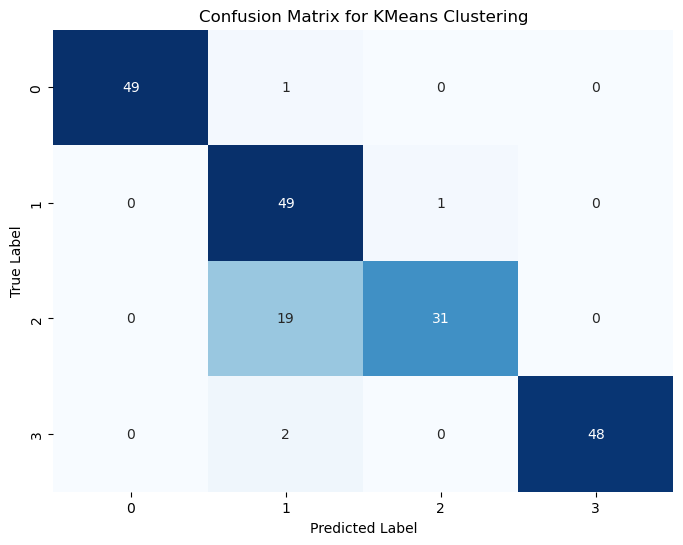

In [29]:
conf_matrix = confusion_matrix(combined_df['label'], combined_df['Cluster'])
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KMeans Clustering')
plt.show()